In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from astropy.io import fits

DECam QE very roughly estimated from "The Imager" Section paragraph 4 [here](https://www.darkenergysurvey.org/the-des-project/instrument/the-camera/)

DECam throughput roughly estimated from [here](https://noirlab.edu/science/programs/ctio/filters/Dark-Energy-Camera)

Rubin throughput roughly estimated from [the overview paper](https://arxiv.org/pdf/0805.2366.pdf)

In [2]:
lmcFits = "/home/a/adriansh/analysis/stringScratch/fits/c4d_200124_054457_ooi_r_v1_extn=39_POS=80.89166667,-69.7_SIZE=1,1.fits"
hdul = fits.open(lmcFits)
hdr = hdul[0].header
data = hdul[0].data

blancoM1Area = (2 * u.meter)**2 * np.pi
blancoPlateScale = hdr["PIXSCAL1"] * u.arcsec / u.pixel
blancoExptime = hdr["EXPTIME"] * u.second
blancoGain = hdr["ARAWGAIN"] * u.electron / u.adu
blancoQE = 0.7 * u.photon / u.electron
blancoRThroughput = 0.8

rubinM1Area = (3.2 * u.meter)**2 * np.pi
rubinPlateScale = 0.2 * u.arcsec / u.pixel
rubinExptime = 15 * u.second
rubinRThroughput = 0.6

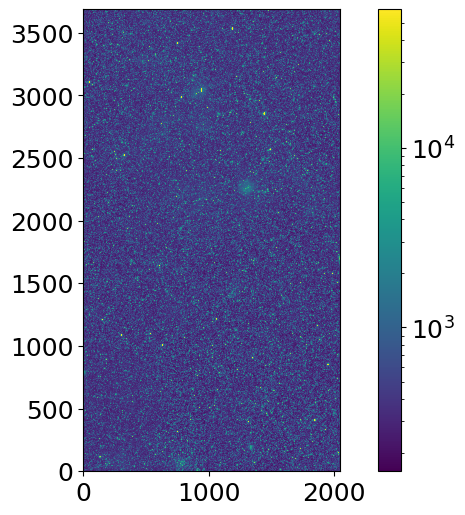

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

im = ax.imshow(data, origin='lower', interpolation='None', norm="log")
ax.tick_params(labelsize=18)

cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)

fig.show()

In [4]:
blancoADUPerPixel = data.mean() * u.adu
blancoPhotonsPerPixelPerSecond = (blancoADUPerPixel * blancoGain * 
                                  blancoQE / (blancoRThroughput * blancoExptime))

blancoPhotonsPerPixelPerSecond

<Quantity 24.38935757 ph / s>

In [5]:
rubinPhotonsPerPixelPerSecond = (blancoPhotonsPerPixelPerSecond * rubinM1Area / blancoM1Area
                                 * (rubinPlateScale / blancoPlateScale)**2 * rubinRThroughput)
rubinPhotonsPerPixelPerSecond

<Quantity 20.55531042 ph / s>

In [6]:
rubinPhotonsPerPixelPerSecond * rubinExptime 

<Quantity 308.32965625 ph>